In [22]:
from xgboost import XGBClassifier, XGBRFRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot  as plt

In [23]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000] # 多分类任务
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
# eval_metrix参数
# rmes: 均方根误差
# mae: 平均绝对值误差
# logloss: 负对数似然函数值
# mlogloss: 多分类logloss(多分类)
# error: 二分类错误率 
# merror: 多分类错误率(多分类)
# auc

xg1 = XGBClassifier(n_jobs=-1)
eval_set = [(X_train, y_train), (X_test, y_test)]
xg1.fit(X_train, y_train, 
        early_stopping_rounds=20, # mlogloss在20轮迭代之内，都没有提升的话，就stop
        eval_set=eval_set, # A list of (X, y) tuple pairs to use as validation sets, for which metrics will be computed. Validation metrics will help us track the performance of the model.
        eval_metric='mlogloss', verbose=5)

[0]	validation_0-mlogloss:1.34350	validation_1-mlogloss:1.41875
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 20 rounds.
[5]	validation_0-mlogloss:0.54737	validation_1-mlogloss:0.72195
[10]	validation_0-mlogloss:0.33491	validation_1-mlogloss:0.54876
[15]	validation_0-mlogloss:0.23996	validation_1-mlogloss:0.46995
[20]	validation_0-mlogloss:0.18769	validation_1-mlogloss:0.43613
[25]	validation_0-mlogloss:0.14691	validation_1-mlogloss:0.41167
[30]	validation_0-mlogloss:0.11647	validation_1-mlogloss:0.39809
[35]	validation_0-mlogloss:0.09630	validation_1-mlogloss:0.38841
[40]	validation_0-mlogloss:0.07782	validation_1-mlogloss:0.38065
[45]	validation_0-mlogloss:0.06769	validation_1-mlogloss:0.37979
[50]	validation_0-mlogloss:0.05827	validation_1-mlogloss:0.38217
[55]	validation_0-mlogloss:0.04818	validation_1-mlogloss:0.38326
[60]	validation_0-mlogloss:0.04271	validation_1-mloglos

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [25]:
xg1.predict(X_test)

array([2, 2, 7, 2, 7, 5, 1, 2, 2, 2, 4, 2, 4, 5, 2, 4, 2, 6, 6, 6, 2, 6,
       2, 6, 7, 5, 5, 3, 3, 5, 5, 5, 3, 2, 6, 1, 5, 5, 5, 5, 2, 2, 2, 7,
       1, 3, 2, 2, 2, 1, 5, 1, 5, 6, 2, 3, 2, 5, 2, 2, 1, 1, 1, 5, 5, 6,
       5, 2, 2, 5, 6, 4, 5, 2, 5, 2, 6, 2, 5, 2, 2, 5, 6, 1, 2, 5, 2, 6,
       1, 1, 7, 1, 1, 2, 2, 2, 2, 2, 4, 2, 7, 6, 5, 2, 4, 2, 5, 2, 3, 2,
       5, 2, 6, 3, 2, 2, 7, 2, 2, 6, 5, 2, 5, 7, 2, 5, 2, 4, 5, 5, 4, 5,
       4, 5, 6, 5, 1, 2, 5, 5, 2, 6, 2, 2, 6, 2, 2, 1, 2, 3, 5, 5, 2, 3,
       5, 5, 1, 2, 2, 6, 1, 6, 5, 4, 4, 1, 2, 6, 6, 5, 2, 5, 2, 2, 5, 6,
       1, 5, 6, 1, 2, 5, 6, 1, 2, 1, 2, 2, 1, 5, 2, 5, 4, 2, 2, 5, 2, 2,
       2, 1, 5, 5, 2, 2, 6, 1, 5, 3, 6, 2, 2, 1, 1, 6, 2, 1, 2, 4, 2, 3,
       2, 3, 2, 2, 3, 5, 2, 5, 5, 2, 5, 6, 3, 4, 1, 5, 1, 3, 1, 5, 5, 2,
       2, 2, 2, 6, 3, 2, 5, 5, 5, 6, 5, 7, 2, 2, 5, 5, 2, 2, 5, 5, 5, 2,
       6, 5, 6, 2, 2, 5, 5, 2, 5, 7, 6, 5, 1, 2, 2, 2, 2, 2, 5, 1, 2, 2,
       2, 2, 5, 2, 2, 1, 5, 3, 5, 5, 2, 2, 3, 1, 5,

In [26]:
# 预测结果可以输出为概率向量
xg1.predict_proba(X_test) # 仅分类算法

array([[9.0076933e-03, 9.3313557e-01, 1.8509743e-03, ..., 2.4648037e-02,
        3.0539548e-02, 3.0849333e-04],
       [1.8339330e-01, 8.1440037e-01, 4.5345779e-04, ..., 6.0631923e-04,
        3.4785259e-04, 4.4834713e-04],
       [1.3612825e-01, 2.0261945e-01, 1.3023376e-03, ..., 6.9556604e-03,
        1.3273350e-03, 6.5066075e-01],
       ...,
       [1.7610076e-01, 6.3352913e-01, 9.2045858e-04, ..., 1.8637858e-01,
        9.2311262e-04, 1.2181682e-03],
       [5.7825114e-04, 1.1219328e-03, 3.7596199e-01, ..., 1.9339687e-03,
        7.7794589e-02, 2.9811417e-04],
       [5.4233791e-03, 6.3961260e-02, 9.3444274e-04, ..., 9.0632939e-01,
        2.2427246e-02, 4.7412462e-04]], dtype=float32)

In [27]:
xg1.score(X_test, y_test) # 精度

0.8493333333333334

In [28]:
xg1.feature_importances_ # 特征的相对重要性(值越大,重要程度越高)

array([0.05522266, 0.01027789, 0.0076129 , 0.01713795, 0.0117458 ,
       0.02694086, 0.01142352, 0.01274354, 0.01036926, 0.01293497,
       0.14072125, 0.        , 0.00381157, 0.        , 0.01090817,
       0.02562974, 0.02621816, 0.        , 0.00777717, 0.00439228,
       0.        , 0.        , 0.        , 0.00746002, 0.0142416 ,
       0.04495807, 0.00921845, 0.        , 0.        , 0.00758998,
       0.27133602, 0.00381228, 0.0042282 , 0.01924067, 0.        ,
       0.01367765, 0.03491041, 0.02495222, 0.        , 0.        ,
       0.        , 0.        , 0.00697156, 0.11703692, 0.00318799,
       0.00540709, 0.00494895, 0.        , 0.        , 0.        ,
       0.        , 0.00663968, 0.00431461, 0.        ], dtype=float32)

In [29]:
evals_result = xg1.evals_result() # 根据fit函数中eval_set参数与eval_metric参数返回评估结果

train_evals = evals_result['validation_0']['mlogloss']
test_evals = evals_result['validation_1']['mlogloss']

Text(0.5, 0, 'rounds')

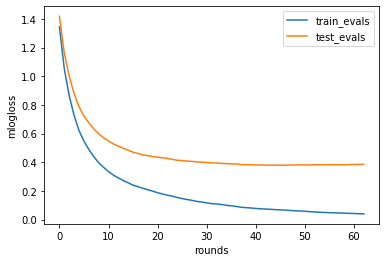

In [30]:
plt.plot(train_evals, label='train_evals')
plt.plot(test_evals, label='test_evals')
plt.legend()
plt.ylabel('mlogloss')
plt.xlabel('rounds')

In [31]:
X = datasets.load_boston().data
y = datasets.load_boston().target
X_train, X_test, y_train, y_test = train_test_split(X, y)
xg2 = XGBRFRegressor(n_jobs=-1)
xg2.fit(X_train, y_train)
xg2.score(X_test, y_test) # R^2

0.8623617742707503

In [32]:
xg2.feature_importances_

array([0.03093924, 0.00350362, 0.06949744, 0.02200447, 0.05060653,
       0.3743455 , 0.01225269, 0.05603998, 0.01392062, 0.02865376,
       0.05762986, 0.01308077, 0.2675255 ], dtype=float32)

In [34]:
xg2.predict(X_test)

array([20.04417  , 23.110819 , 19.769611 , 21.27759  , 20.904688 ,
       23.634356 , 22.11364  , 12.313858 , 20.310982 , 20.651989 ,
       30.48154  , 33.58553  , 11.847392 , 20.30512  , 19.761637 ,
       22.213053 , 23.917452 , 33.433487 , 24.213072 , 21.155676 ,
       20.608992 , 34.109543 , 12.411354 , 15.936315 , 20.734428 ,
       17.296545 , 20.479542 , 23.977943 , 18.172781 , 47.347267 ,
       11.388395 , 20.688377 , 23.712427 , 24.147476 , 29.110638 ,
       19.720243 , 19.81666  , 22.344131 , 23.883602 , 16.31734  ,
       29.600878 , 40.43114  , 33.411983 , 20.574564 , 21.599693 ,
       20.52764  , 20.180065 , 20.767645 , 24.160398 , 32.482147 ,
       17.651007 , 26.317438 , 22.594868 , 20.652876 , 21.256527 ,
       33.798492 , 16.49691  , 21.64472  , 10.808232 , 21.921637 ,
       15.023231 ,  9.130901 , 14.141525 , 20.423061 , 21.255466 ,
       20.007343 , 33.559902 , 22.065434 ,  8.332447 , 20.034346 ,
       10.968183 , 28.078182 , 33.61688  , 14.162017 , 14.4972